In [11]:
import matplotlib.pyplot as plt
# Open the file in read mode ('r' for read)
with open(file_path, 'r') as file:
    # Read all lines and store them in a list
    lines = file.readlines()

# Print or do something with the lines
print(lines)


['0.00000\t227.99770\t14.20001\n', '1.00000\t227.99872\t13.26973\n', '2.00000\t227.99969\t13.23710\n', '3.00000\t228.00070\t13.23398\n', '4.00000\t228.00169\t13.24609\n', '5.00000\t228.00270\t13.23336\n', '6.00000\t228.00369\t13.22813\n', '7.00000\t228.00470\t13.23206\n', '8.00000\t228.00568\t13.23710\n', '9.00000\t228.00670\t13.24001\n', '10.00000\t228.00769\t13.22611\n', '11.00000\t228.00870\t13.22756\n', '12.00000\t228.00969\t13.23416\n', '13.00000\t228.01070\t13.24470\n', '14.00000\t228.01170\t13.23515\n', '15.00000\t228.01270\t13.23508\n', '16.00000\t228.01372\t13.24964\n', '17.00000\t228.01469\t13.25279\n', '18.00000\t228.01570\t13.24850\n', '19.00000\t228.01669\t13.25065\n', '20.00000\t228.01770\t13.25230\n', '21.00000\t228.01869\t13.24175\n', '22.00000\t228.01971\t13.23320\n', '23.00000\t228.02069\t13.24305\n', '24.00000\t228.02170\t13.22927\n', '25.00000\t228.02269\t13.20371\n', '26.00000\t228.02370\t13.21217\n', '27.00000\t228.02469\t13.22129\n', '28.00000\t228.02570\t13.2027

In [30]:
file_path=r"C:\Users\dilip\Downloads\Intensity Autocorrelation Data\Intensity Autocorrelation Data\Type-II\Type-II\intensity_autocoorelation_type ii_for 0.5 mm BBO_phi 0_28 cut edge angle_at angle 200_without filter_09_07_23"

In [31]:
# Read the data from the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the middle column
middle_column_float = [float(line.split('\t')[2]) for line in lines]

# Save the middle column to a new file
with open('middle_column.txt', 'w') as new_file:
    for value in middle_column:
        new_file.write(value + '\n')

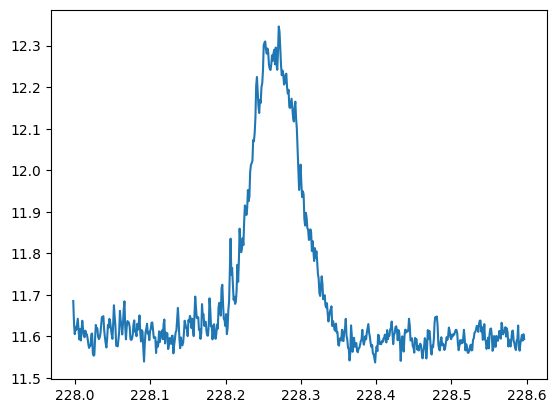

In [32]:
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the middle column
middle_column_float1 = [float(line.split('\t')[1]) for line in lines]

# Save the middle column to a new file
with open('middle_column.txt', 'w') as new_file:
    for value in middle_column:
        new_file.write(value + '\n')

plt.plot(middle_column_float1,middle_column_float)

NameError: name 'np' is not defined

In [34]:
import numpy as np

In [35]:
k=np.array(middle_column_float)

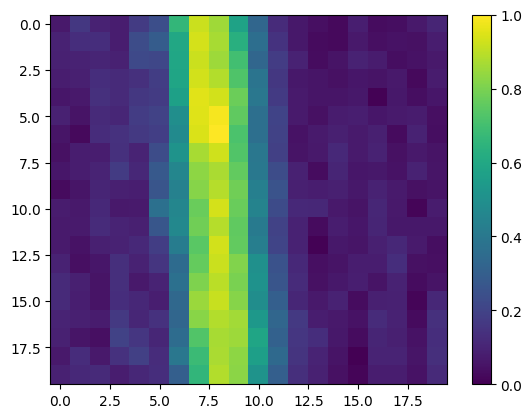

In [49]:
from matplotlib.colors import Normalize
# Take the central 400 elements
central_data = k[100:500]

# Reshape into a (20, 20) array

# rotated_data = np.rot90(reshaped_data)
normalized_intensities=central_data/np.max(central_data)
reshaped_data1 = normalized_intensities.reshape((20, 20))
reshaped_data2= normalized_intensities.reshape((20, 20))
reshaped_data3 = normalized_intensities.reshape((20, 20))
reshaped_data4 = normalized_intensities.reshape((20, 20))
# normalized_data = norm(rotated_data)
# Create a heatmap
plt.imshow(normalized_data, cmap='viridis', aspect='auto')
plt.colorbar()

# Show the plot
plt.show()

In [60]:
from skimage.transform import resize

# Assuming your data is stored in the variable 'input_data'
resized_data = resize(reshaped_data1, (40, 40), mode='constant')
L=resized_data.T

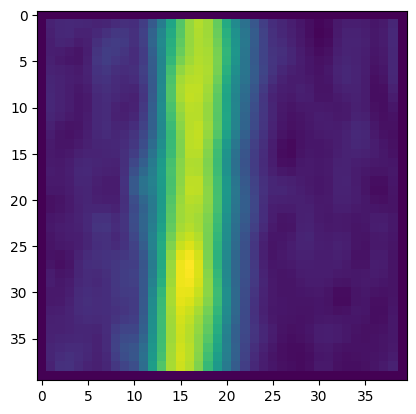

In [61]:
fig, ax = plt.subplots()

ax.imshow(L)

# Show the plot
plt.show()


In [51]:
stacked_data = np.stack((reshaped_data1, reshaped_data2,reshaped_data3, reshaped_data4), axis=-1)

In [52]:
stacked_data.shape

(20, 20, 4)

In [53]:
input1 = np.transpose(stacked_data, (1, 0, 2))

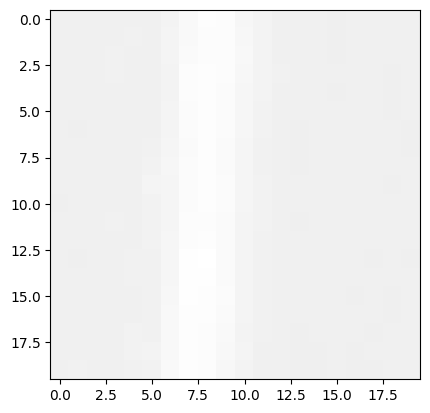

In [55]:
fig, ax = plt.subplots()

ax.imshow(input1 )

# Show the plot
plt.show()

In [65]:
# Assuming your input data is a 40x40 grayscale image named "input_image"
input_image = np.expand_dims(L, axis=-1)  # Add a channel dimension

# Replicate the existing channel three times
repeated_channels = np.repeat(input_image, 4, axis=-1)

# Now your "repeated_channels" variable has the shape (40, 40, 3) and can be used as input to your original CNN model

# Feed the modified input to your model
# model_predictions = model.predict(repeated_channels)

In [66]:
repeated_channels.shape

(40, 40, 4)

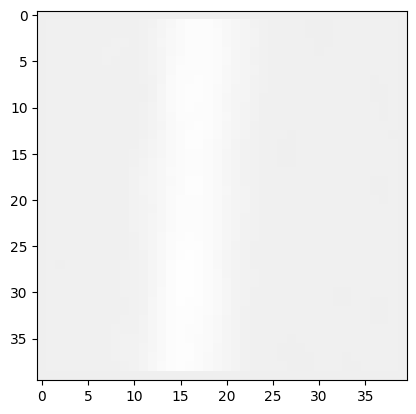

In [67]:
fig, ax = plt.subplots()

ax.imshow(repeated_channels)

# Show the plot
plt.show()

In [105]:
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense ,BatchNormalization

In [103]:
inputs = []
outputs = []

for i in range(1,10):  # Load 10 datasets
    with open(f"C://Users//dilip//OneDrive//Desktop//MTP//input//input{i}.pkl", "rb") as f:
        inputs.append(pickle.load(f))
    with open(f"C://Users//dilip//OneDrive//Desktop//MTP//output//char_electric_field_{i}.pkl", "rb") as f:
        outputs.append(pickle.load(f))

inputs = np.array(inputs)
outputs = np.array(outputs)

In [104]:
if outputs.ndim == 1:  # Reshape to (1000, 1) if needed
    outputs = outputs.reshape(-1, 1)

In [142]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 4)),
    Conv2D(62, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(62, (3, 3), activation='relu'),
    
    Conv2D(128, (3, 3), activation='relu'),
  
    Conv2D(62, (3, 3), activation='relu'),

    Conv2D(62, (3, 3), activation='relu'),
    
    Conv2D(128, (3, 3), activation='relu'),
    
    Flatten(),

    Dense(50, activation='relu'),

    Dense(1000, activation='linear')  # Output layer matches electric field size
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust loss as needed

In [143]:
model.fit(inputs, outputs, epochs=300,batch_size=32)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 1.3211e-04
Epoch 2/300
1/1 [==============================] - 0s 239ms/step - loss: 9.6228e-05
Epoch 3/300
1/1 [==============================] - 0s 232ms/step - loss: 9.4249e-05
Epoch 4/300
1/1 [==============================] - 0s 255ms/step - loss: 9.2849e-05
Epoch 5/300
1/1 [==============================] - 0s 253ms/step - loss: 9.1526e-05
Epoch 6/300
1/1 [==============================] - 0s 237ms/step - loss: 9.0312e-05
Epoch 7/300
1/1 [==============================] - 0s 256ms/step - loss: 8.9221e-05
Epoch 8/300
1/1 [==============================] - 0s 232ms/step - loss: 8.8306e-05
Epoch 9/300
1/1 [==============================] - 0s 242ms/step - loss: 8.7581e-05
Epoch 10/300
1/1 [==============================] - 0s 260ms/step - loss: 8.7076e-05
Epoch 11/300
1/1 [==============================] - 0s 254ms/step - loss: 8.6692e-05
Epoch 12/300
1/1 [==============================] - 0s 259ms/step - loss: 8.6

In [144]:

input_ = np.expand_dims(repeated_channels, axis=0)

In [145]:
predicted_field = model.predict(input_)

1/1 [==============================] - 0s 88ms/step


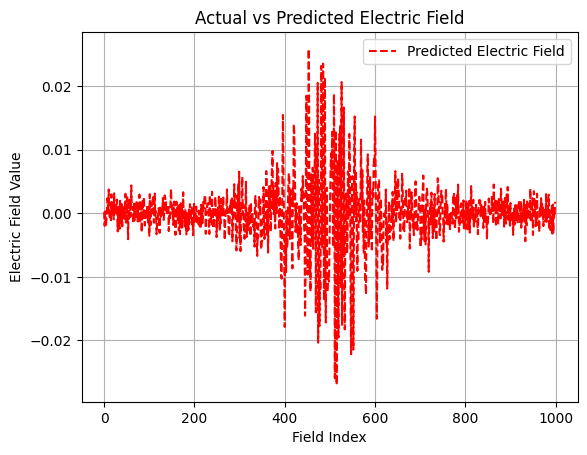

In [146]:
plt.plot(predicted_field[0], label='Predicted Electric Field', linestyle='--', color='red')

plt.xlabel('Field Index')
plt.ylabel('Electric Field Value')
plt.title('Actual vs Predicted Electric Field')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 37ms/step


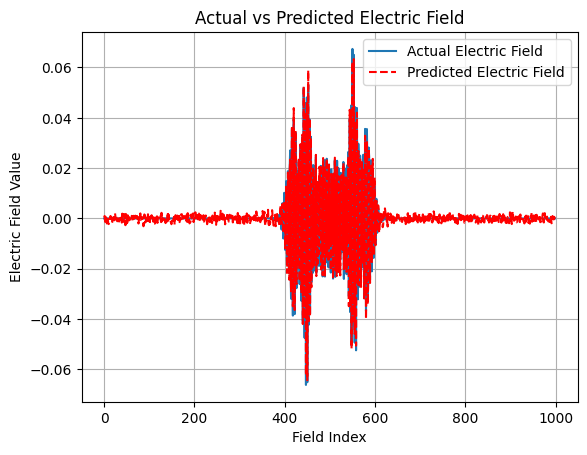

1/1 [==============================] - 0s 35ms/step


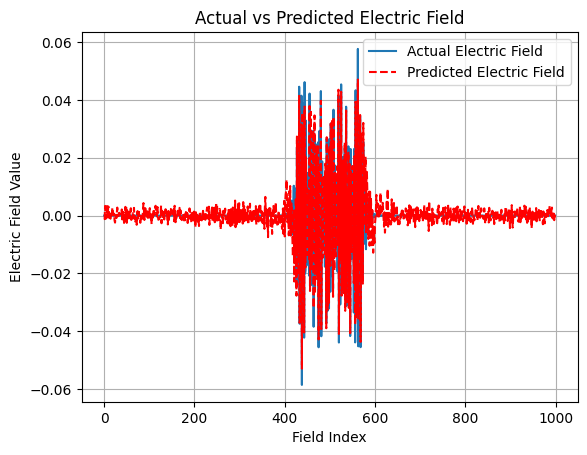

1/1 [==============================] - 0s 31ms/step


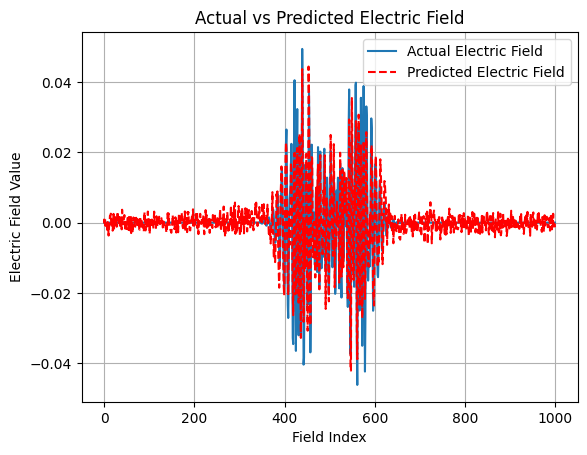

1/1 [==============================] - 0s 24ms/step


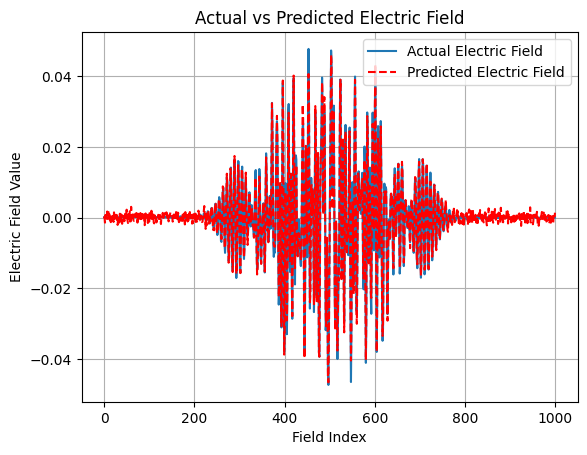

1/1 [==============================] - 0s 47ms/step


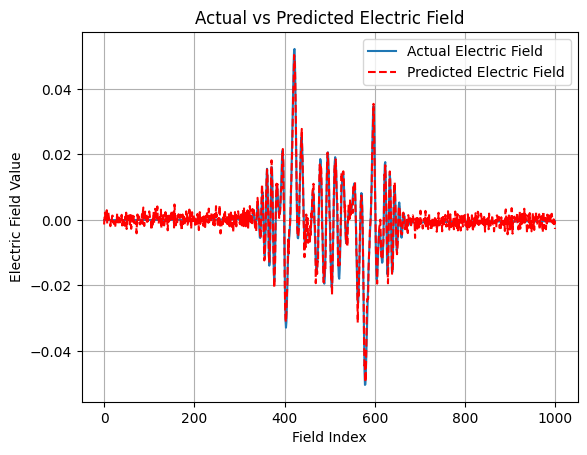

1/1 [==============================] - 0s 20ms/step


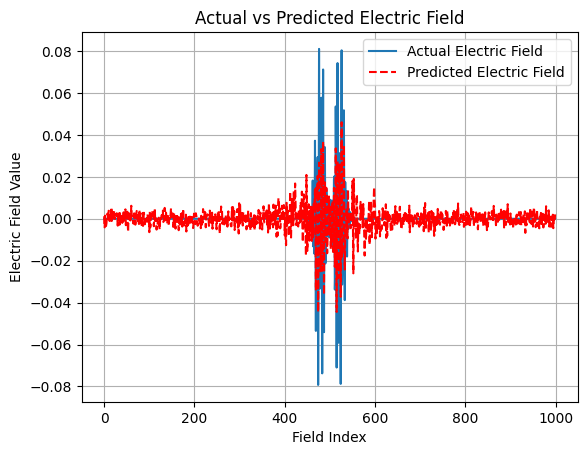

1/1 [==============================] - 0s 32ms/step


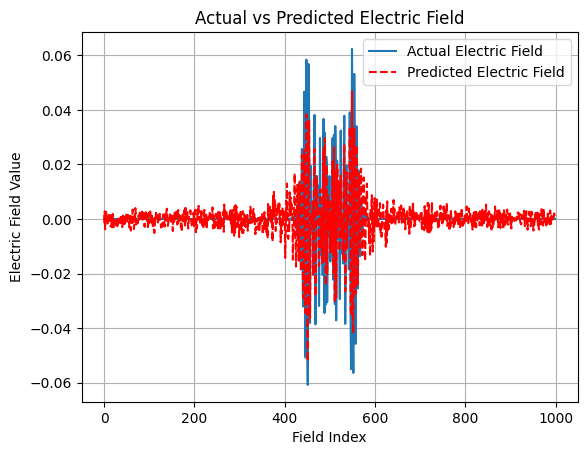

1/1 [==============================] - 0s 40ms/step


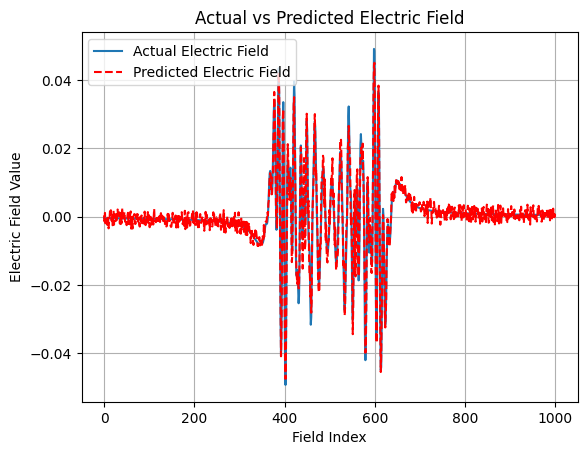

1/1 [==============================] - 0s 36ms/step


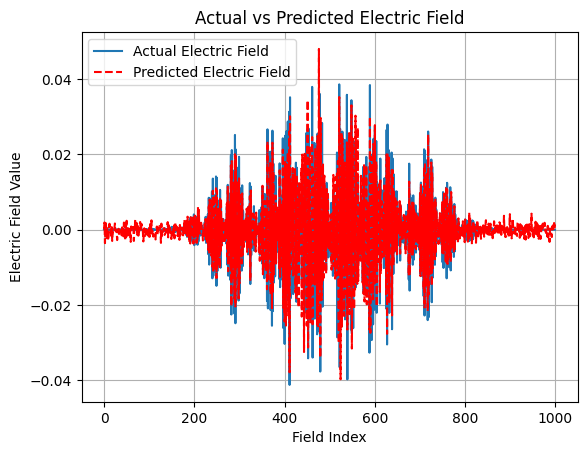

In [147]:
for i in range (1,10):
    with open(f"C://Users//dilip//OneDrive//Desktop//MTP//input//input{i}.pkl", "rb") as f:

            input_ = pickle.load(f)
    with open(f"C://Users//dilip//OneDrive//Desktop//MTP//output//char_electric_field_{i}.pkl", "rb") as f:
            actual_field = pickle.load(f)


    # actual_field = outputs[0]  # Example actual field

    input_ = np.expand_dims(input_, axis=0)  # Now shape should be (1, 40, 40, 4)

    predicted_field = model.predict(input_)  # Predict for the same input

    # plt.figure(figsize=(12, 6))  # Adjust figure size as needed

    # Plot actual field
    plt.plot(actual_field, label='Actual Electric Field')

    # Plot predicted field with a different color and style
    plt.plot(predicted_field[0], label='Predicted Electric Field', linestyle='--', color='red')

    plt.xlabel('Field Index')
    plt.ylabel('Electric Field Value')
    plt.title('Actual vs Predicted Electric Field')
    plt.legend()
    plt.grid(True)
    plt.show()